In [1]:
import pandas as pd
from glob import glob as lsfiles
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
import os
import matplotlib as mpl


from matplotlib import font_manager as fm, rcParams
fpath_reg = os.path.join(mpl.get_data_path(), "/Library/Fonts/RobotoCondensed-Regular.ttf")
prop_reg = fm.FontProperties(fname=fpath_reg)
fpath_light = os.path.join(mpl.get_data_path(), "/Library/Fonts/RobotoCondensed-light.ttf")
prop_light = fm.FontProperties(fname=fpath_light)

pd.options.mode.chained_assignment = None  # default='warn'



In [2]:
df_hosp = pd.read_pickle('df_all_hosp.pkl')
df_death = pd.read_pickle('df_all_death.pkl')

In [5]:
df_hosp['WIS_normalized'] = df_hosp['WIS']/df_hosp['Population']
df_death['WIS_normalized'] = df_death['WIS']/df_death['Population']

In [10]:
df_hosp = df_hosp.rename(columns= {"WIS_normalized":"values","Model":"group"})
df_death = df_death.rename(columns= {"WIS_normalized":"values","Model":"group"})


In [12]:
df_hosp.head()

,group,WIS,50% Coverage,95% Coverage,Location,Population,values
0,Ensemble,362.308662,0.000000,0.777778,Alabama,4903185,0.000074
1,Ensemble_LOP,379.705378,0.666667,1.000000,Alabama,4903185,0.000077
2,Ensemble_LOP_untrimmed,456.626749,0.888889,1.000000,Alabama,4903185,0.000093
3,JHU_IDD-CovidSP,509.992508,0.111111,0.888889,Alabama,4903185,0.000104
4,MOBS_NEU-GLEAM_COVID,357.222928,0.333333,0.666667,Alabama,4903185,0.000073


In [164]:
models = list(df_hosp.group.unique())
allmed = []
for model in models:
    med = df_hosp[df_hosp['group']== model]['WIS'].median()
    allmed.append(med)

In [176]:
a = zip(models, allmed)
a=list(a)
res = sorted(a, key = lambda x: x[1])
modelorder = list(zip(*res))[0]

In [181]:
df_hosp.group = df_hosp.group.astype("category")
df_hosp.group = df_hosp.group.cat.set_categories(modelorder)
df_hosp.sort_values(["group"])

In [191]:
models = list(df_death.group.unique())
allmed = []
for model in models:
    med = df_death[df_death['group']== model]['WIS'].median()
    allmed.append(med)
a = zip(models, allmed)
a=list(a)
res = sorted(a, key = lambda x: x[1])
modelorder = list(zip(*res))[0]
df_death.group = df_death.group.astype("category")
df_death.group = df_death.group.cat.set_categories(modelorder)
df_death.sort_values(["group"])

,group,WIS,50% Coverage,95% Coverage,Location,Population,values
281,UVA-EpiHiper,204.316833,0.222222,0.444444,New Jersey,8882190,0.000023
34,UVA-EpiHiper,30.679367,0.444444,1.000000,Arkansas,3017804,0.00001
71,UVA-EpiHiper,15.147313,0.555556,0.777778,Delaware,973764,0.000016
408,UVA-EpiHiper,30.071201,0.444444,1.000000,Utah,3205958,0.000009
181,UVA-EpiHiper,20.085238,0.111111,0.777778,Maine,1344212,0.000015
...,...,...,...,...,...,...,...
133,NotreDame-FRED,175.671181,0.000000,0.111111,Indiana,6732219,0.000026
89,UTA-ImmunoSEIRS,778.267001,0.000000,0.000000,Florida,21477737,0.000036
43,UTA-ImmunoSEIRS,633.642402,0.000000,0.111111,California,39512223,0.000016
398,UTA-ImmunoSEIRS,617.473300,0.111111,0.111111,Texas,28995881,0.000021


In [189]:
def create_penguin_plots(data,kde_args, title ,color = "#49AFB7",color_category=None, group2name = None):
    
    """
    input:
    data (pandas dataframe): with the two columns named group and values
    kde_args (dictionary): contains information for the kde (lw is the line with, bw_adjust changes the smoothing), look up these args in seaborns kde plots to get more info
    color category: colors the dots different colors depending other whether you want to show that
    group2name (dict): keys are the groups (whatever is in the group column) and values are the "names"
    
    output: fig/ax of figure
    """


    total_groups = data.group.unique().shape[0]
    total_min = 0 #data['values'].min()
    total_max = data['values'].max()*1.2


    fig, ax = plt.subplots(total_groups*2,1,figsize = (22,total_groups*2.3),tight_layout = False)
    plt.subplots_adjust(hspace=-.08)

    i = 0
    for group, df in data.groupby("group"):


        values = df["values"].values # this is the list of values you are showing in your distribution
        print(group,np.median(values))


        #distribution
        sns.kdeplot(values, ax = ax[i],shade=True,lw=kde_args["lw"],bw_adjust=kde_args["bw_adjust"],color = color,)
        #sns.distplot(US_values, ax = ax[i],hist = False,
        #      kde_kws={"shade":False,"lw":"3"},color = "w")

        min_,max_ = ax[i].get_ylim()

        ax[i].set_ylim(ymin = 0, ymax = max_*1.1)


        sns.boxplot(values,ax = ax[i+1],color = color, showfliers = False, linewidth=1)
        for patch in ax[i+1].patches:
            r, g, b, a = patch.get_facecolor()
            patch.set_facecolor((r, g, b, .1))
            #fc = patch.get_facecolor()
            #patch.set_facecolor(mpl.colors.to_rgba(fc, 0.1))

        if color_category:
            cmap = mpl.cm.get_cmap('Set2', df.continent_label.unique().shape[0])
            ci = 0
            for cont, df_cont in df.groupby(color_category):
                sns.swarmplot(df_cont['values'].values,ax = ax[i+1],color = cmap(ci),alpha = .9,label = cont)
                ci+=1
            if i+1 ==1:
                ax[i+1].legend(loc = 1, prop= prop_light)
        else:
            sns.swarmplot(values,ax = ax[i+1],color = color,alpha = .35,) 

        ax[i].axis("off")
        ax[i+1].axis("off")

        ax[i+1].set_xlim(xmin = total_min,xmax = total_max,)
        ax[i].set_xlim(xmin = total_min,xmax = total_max)

        ax[i+1].set_ylim(-.6,.5)
        #if i != 6:
        #    ax[i+1].hlines(y = -.6,xmin = total_min,xmax = total_max,linewidth = 2,zorder = 100,color = "#49AFB7")

        text = "%s"
        if group2name:
            ax[i].text(.03,0,group2name[group],transform=ax[i].transAxes,  horizontalalignment= "right",\
               fontsize = 14, verticalalignment='center',backgroundcolor = "w")
        else:
            ax[i].text(.0001,0,group,transform=ax[i].transAxes,  horizontalalignment= "right",\
               fontsize = 14, verticalalignment='center',backgroundcolor = "w")
        i +=2
    last = i+1-2
    ax[last].axis("on")
    ax[last].spines["top"].set_visible(False)
    ax[last].spines["left"].set_visible(False)
    ax[last].spines["right"].set_visible(False)
    ax[last].set_facecolor("none")


    #Test
    ticks = ax[last].get_xticks()
    print(ticks)
    #ax[last-1].set_xticks([round(i,4) for i in ticks])
    #ax[last].set_xticklabels(["{:,}".format(int(i)) for i in ticks],  fontsize = 16)
    #ax[last-1].set_xticklabels([round(i,4) for i in ticks],  fontsize = 16)
    
    for t in ticks:
        if t != 0:
            for ii in range(total_groups*2):
                ax[ii].axvline(x = t,ymin = 0,ymax= 1,linewidth = .8,zorder = 0,color = "gray",alpha = 0.5)
                #ax[ii].vlines(x = t+5000,ymin = -.5,ymax= .444,linewidth = .8,zorder = 0,color = "gray",alpha = 0.5)
    plt.suptitle(title, fontsize=20)
    return fig, ax



Ensemble 3.792883655416876e-05
JHU_IDD-CovidSP 4.246993134880944e-05
Ensemble_LOP 4.6403511704986715e-05
Ensemble_LOP_untrimmed 5.976641701953957e-05
MOBS_NEU-GLEAM_COVID 7.588517825693285e-05
UNCC-hierbin 0.00012301318974667692
UVA-adaptive 0.00015779592863886992
UVA-EpiHiper 0.00015154669434150634
USC-SIkJalpha 0.00027849053371689056
UTA-ImmunoSEIRS 7.477510492480345e-05
[0.     0.0002 0.0004 0.0006 0.0008 0.001 ]


/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

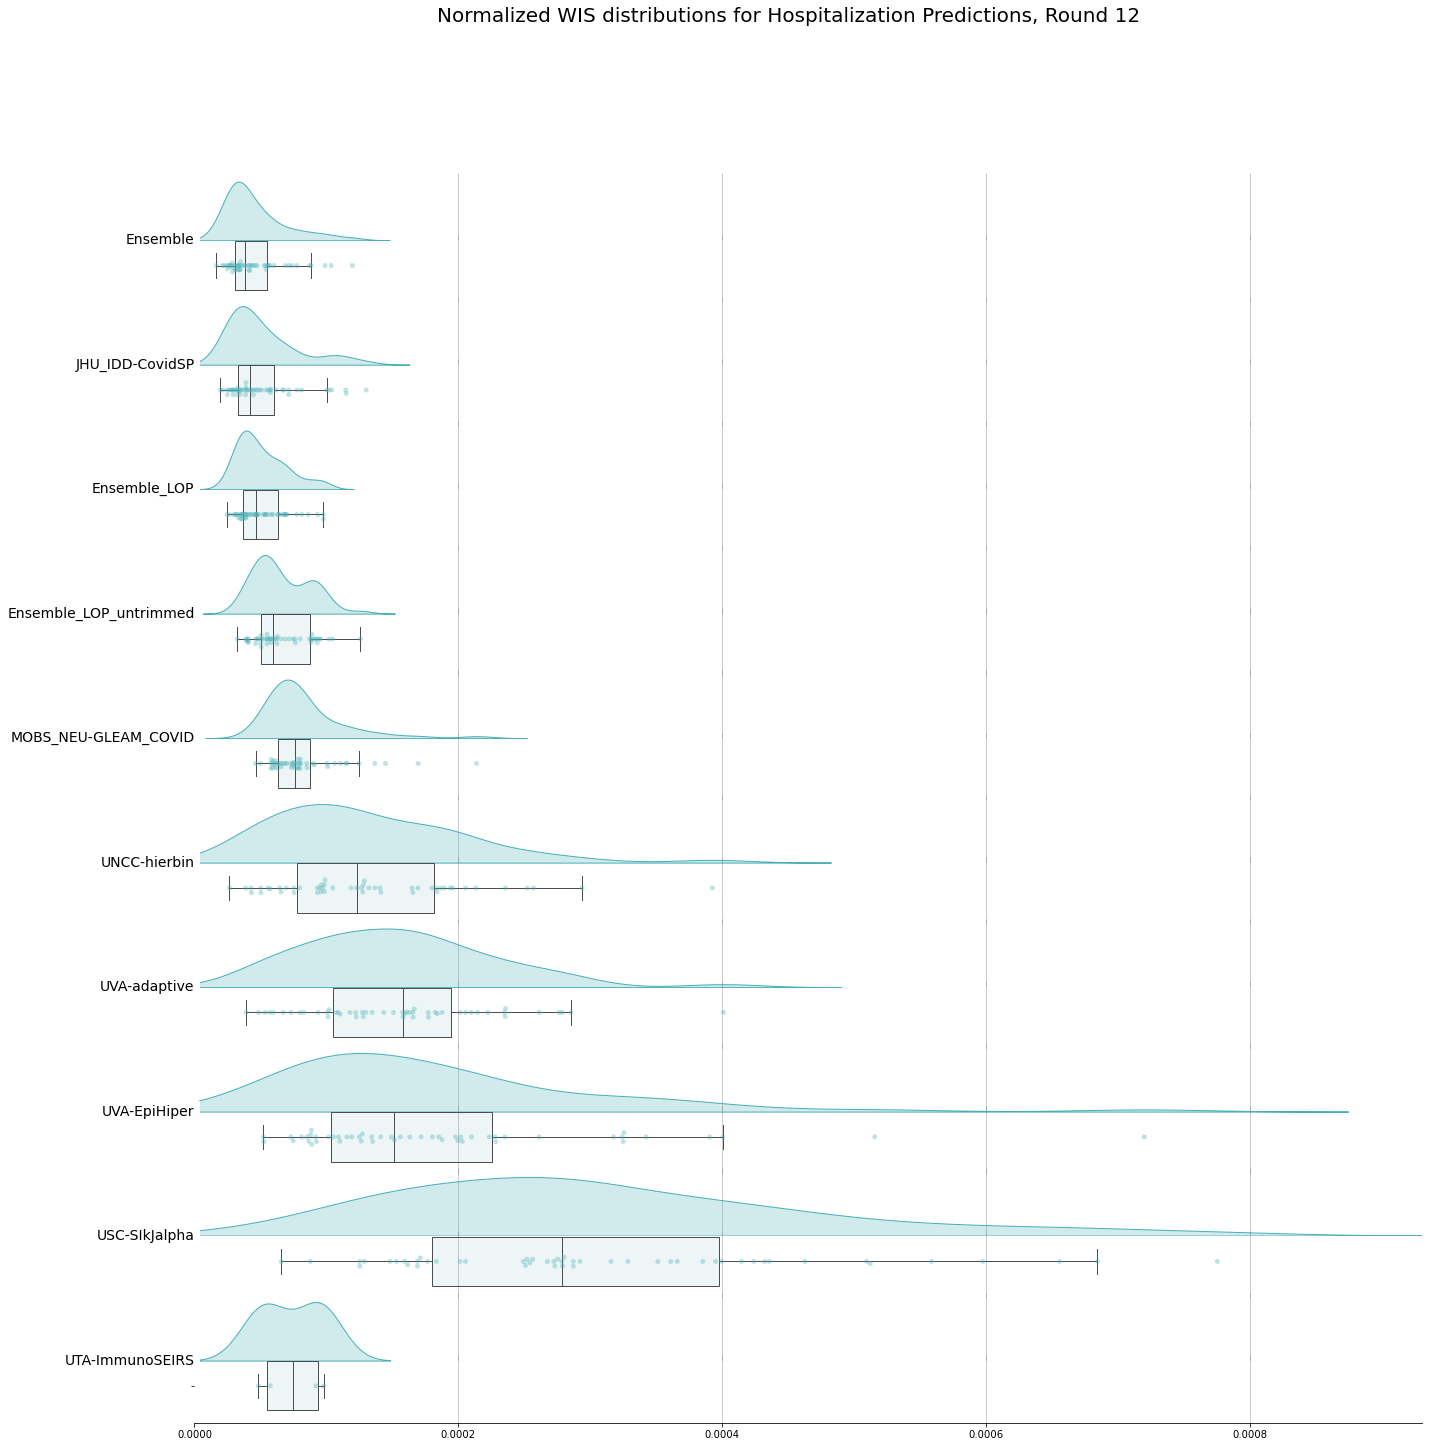

In [190]:

fig, ax_mat = create_penguin_plots(df_hosp,kde_args = {"lw":1,"bw_adjust":.9},
                                   title = 'Normalized WIS distributions for Hospitalization Predictions, Round 12')
plt.savefig('penguinplot_hosp.pdf')

UVA-EpiHiper 1.476916810631747e-05
Ensemble_LOP 1.504244670247285e-05
Ensemble_LOP_untrimmed 1.5310379076483217e-05
Ensemble 1.6688540839199143e-05
MOBS_NEU-GLEAM_COVID 1.4886838854955468e-05
JHU_IDD-CovidSP 1.7546883421830166e-05
USC-SIkJalpha 4.027586506153945e-05
UNCC-hierbin 3.0579376655803945e-05
UVA-adaptive 3.5303084719133724e-05
NotreDame-FRED 2.6094097824123118e-05
UTA-ImmunoSEIRS 2.098841965547646e-05
[0.0e+00 5.0e-05 1.0e-04 1.5e-04 2.0e-04 2.5e-04 3.0e-04]


/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

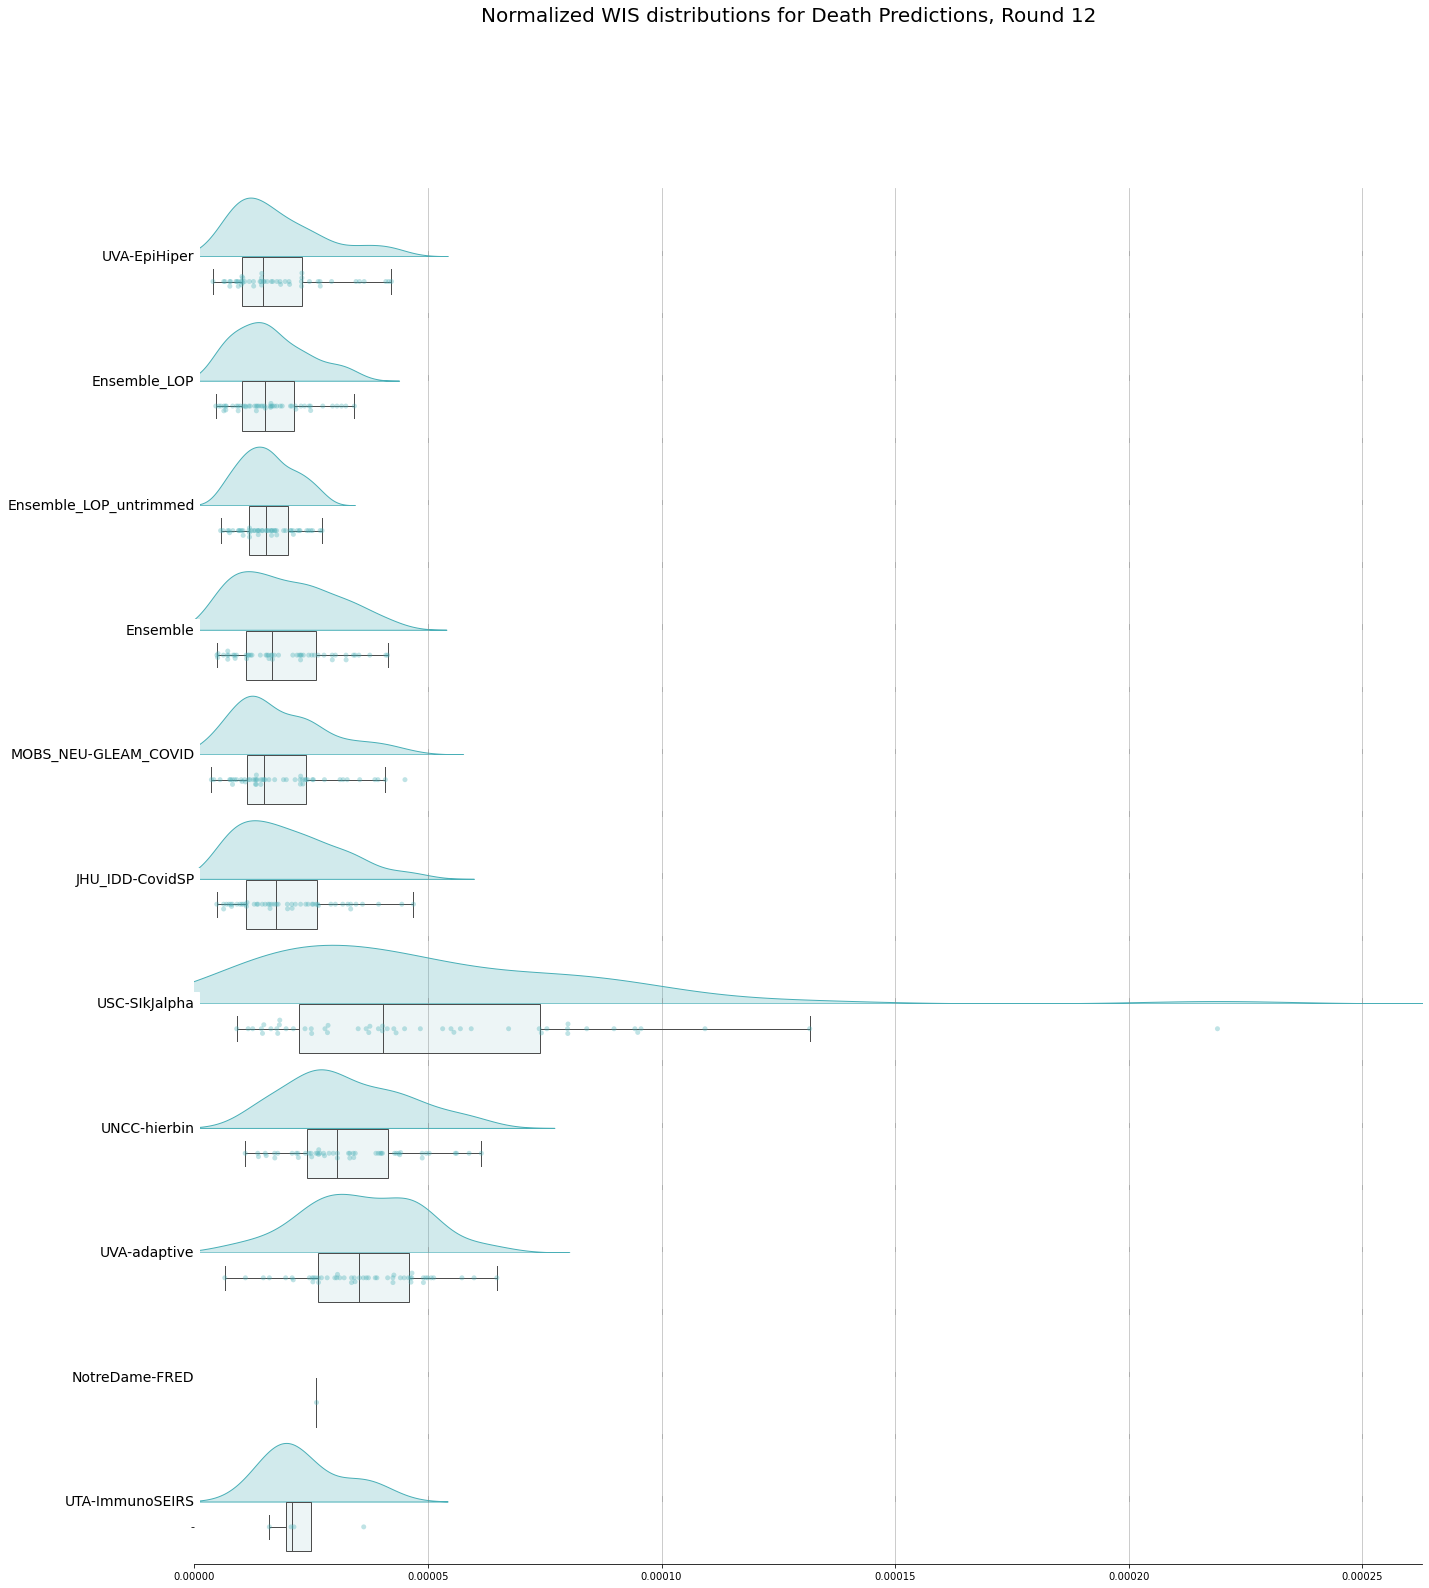

In [192]:
fig, ax_mat = create_penguin_plots(df_death,kde_args = {"lw":1,"bw_adjust":.9},
                                   title = 'Normalized WIS distributions for Death Predictions, Round 12')
plt.savefig('penguinplot_death.pdf')